### dataset download

In [4]:
import tensorflow as tf
import numpy as np
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


### check data

In [5]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

display(y_test)

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### data 시각화

In [6]:
import matplotlib.pyplot as plt

def show_data(arr):
    plt.imshow(arr, cmap = plt.cm.binary)
    
    reshpe_data = arr.reshape(-1, )
    for index, data in enumerate(reshpe_data):
        print('{:3d}'.format(data), end = '')
        if index % 28 == 27:
            print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

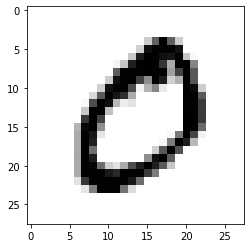

In [7]:
show_data(x_train[1])

28x28의 데이터를 시각화

### 데이터 변환

In [8]:
reshape_x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
reshape_x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### 모델 구성

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


총 3개의 layer로 구성, MNIST 데이터셋에 맞춰 (28, 28, 1)의 형태에 맞춰 인풋 데이터를 받도록 구성

### 모델 컴파일

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 모델 학습

In [12]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=50,
    validation_split=.1,
)


Epoch 1/50
422/422 [==============================] - 1s 892us/step - loss: 3.1756 - acc: 0.2282 - val_loss: 1.8935 - val_acc: 0.2918
Epoch 2/50
422/422 [==============================] - 0s 693us/step - loss: 1.8085 - acc: 0.3226 - val_loss: 1.7728 - val_acc: 0.3217
Epoch 3/50
422/422 [==============================] - 0s 704us/step - loss: 1.6133 - acc: 0.3855 - val_loss: 1.3826 - val_acc: 0.4660
Epoch 4/50
422/422 [==============================] - 0s 671us/step - loss: 1.2448 - acc: 0.5553 - val_loss: 1.0008 - val_acc: 0.6577
Epoch 5/50
422/422 [==============================] - 0s 691us/step - loss: 0.9724 - acc: 0.6794 - val_loss: 0.8211 - val_acc: 0.7700
Epoch 6/50
422/422 [==============================] - 0s 704us/step - loss: 0.7690 - acc: 0.7761 - val_loss: 0.7052 - val_acc: 0.8123
Epoch 7/50
422/422 [==============================] - 0s 698us/step - loss: 0.6182 - acc: 0.8315 - val_loss: 0.5581 - val_acc: 0.8653
Epoch 8/50
422/422 [==============================] - 0s 701us

### 정확도, 손실 시각화

In [13]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

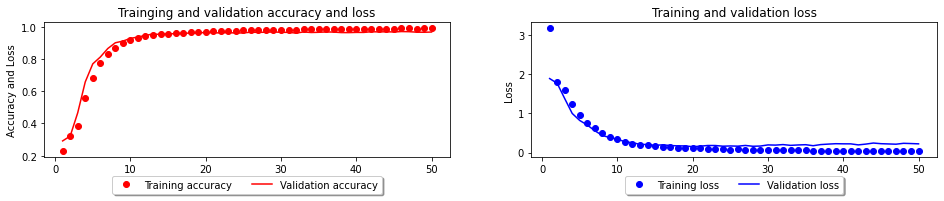

In [14]:
show_graph(history.history)

첫번째 에폭의 결과가 너무 편차가 심하여 그래프를 알아보기 힘드니 10번째 에폭의 결과부터 그래프로 그려보도록 하겠습니다.

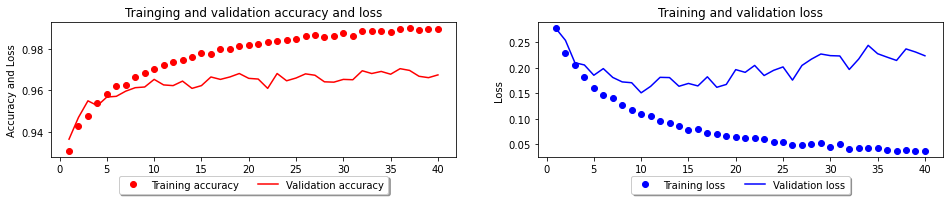

In [15]:
m = map(lambda x: (x[0], x[1][10:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

대략 20 에폭부터 과대적합이 시작되는걸 확인할 수 있습니다.

In [16]:
model.evaluate(reshape_x_test, y_test)    # 정확도

313/313 [==============================] - 0s 413us/step - loss: 0.2585 - acc: 0.9644


[0.25846216082572937, 0.9643999934196472]

# 모델 구성_CNN

In [17]:
# Kernel Initializer로는 유명한 Xavier Initializer를 사용
model = Sequential()
# model.add(layers.InputLayer())
model.add(layers.Conv2D(
    input_shape=(28, 28, 1),
    filters=64, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(
    filters=128, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal'
))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

### 모델 컴파일

In [18]:
# 레이블 데이터를 원-핫 인코딩을 진행하지 않았기 때문에 Loss 펑션에 sparse_categorical_crossentropy를 지정
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 모델 학습

In [19]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=.1,
)

Epoch 1/20
422/422 [==============================] - 17s 39ms/step - loss: 0.6000 - acc: 0.9250 - val_loss: 0.0740 - val_acc: 0.9783
Epoch 2/20
422/422 [==============================] - 16s 39ms/step - loss: 0.0713 - acc: 0.9785 - val_loss: 0.0580 - val_acc: 0.9830
Epoch 3/20
422/422 [==============================] - 17s 41ms/step - loss: 0.0490 - acc: 0.9850 - val_loss: 0.0613 - val_acc: 0.9845
Epoch 4/20
422/422 [==============================] - 17s 39ms/step - loss: 0.0377 - acc: 0.9879 - val_loss: 0.0550 - val_acc: 0.9875
Epoch 5/20
422/422 [==============================] - 16s 39ms/step - loss: 0.0311 - acc: 0.9899 - val_loss: 0.0744 - val_acc: 0.9817
Epoch 6/20
422/422 [==============================] - 17s 39ms/step - loss: 0.0297 - acc: 0.9899 - val_loss: 0.0668 - val_acc: 0.9853
Epoch 7/20
422/422 [==============================] - 16s 39ms/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.0877 - val_acc: 0.9830
Epoch 8/20
422/422 [==============================] - 16s 39ms

### 정확도 및 손실 시각화

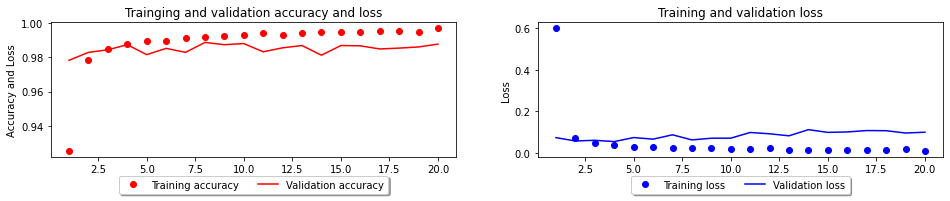

In [20]:
show_graph(history.history)

첫 에폭의 결과 때문에 편차가 심하여 첫 에폭을 제외하고 보도록 하겠습니다.

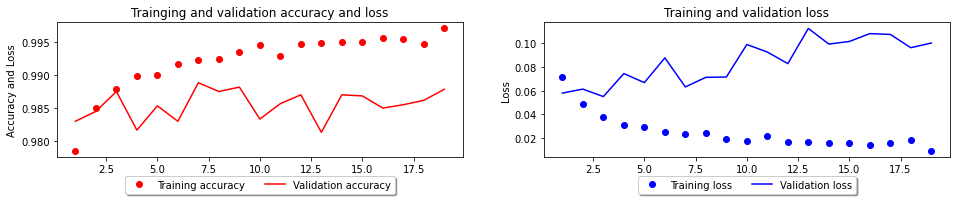

In [21]:
m = map(lambda x: (x[0], x[1][1:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

## 과대적합 해결

### 모델의 재구성

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = Sequential()
model.add(layers.Conv2D(
    input_shape=(28, 28, 1),
    filters=32, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=64, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=128, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Conv2D(
    filters=256, 
    kernel_size=(2, 2), 
    strides=(1, 1), 
    padding='same',
    activation='relu',
    kernel_initializer='glorot_normal',
    kernel_regularizer=regularizers.l2(0.01),
))
model.add(layers.MaxPool2D())
model.add(layers.Dropout(.5))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01),))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)         

### 모델 컴파일

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

### 학습 시작

In [24]:
history = model.fit(
    reshape_x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=.1,
)

Epoch 1/30
422/422 [==============================] - 14s 33ms/step - loss: 8.6517 - acc: 0.1627 - val_loss: 4.9860 - val_acc: 0.1357
Epoch 2/30
422/422 [==============================] - 14s 33ms/step - loss: 4.5386 - acc: 0.2066 - val_loss: 4.2673 - val_acc: 0.1927
Epoch 3/30
422/422 [==============================] - 14s 33ms/step - loss: 3.8345 - acc: 0.2470 - val_loss: 3.4346 - val_acc: 0.3705
Epoch 4/30
422/422 [==============================] - 14s 33ms/step - loss: 3.0856 - acc: 0.3495 - val_loss: 2.3017 - val_acc: 0.7842
Epoch 5/30
422/422 [==============================] - 14s 33ms/step - loss: 1.9906 - acc: 0.6617 - val_loss: 1.1334 - val_acc: 0.9417
Epoch 6/30
422/422 [==============================] - 14s 33ms/step - loss: 1.3228 - acc: 0.8190 - val_loss: 0.8122 - val_acc: 0.9618
Epoch 7/30
422/422 [==============================] - 14s 32ms/step - loss: 0.9940 - acc: 0.8694 - val_loss: 0.6219 - val_acc: 0.9690
Epoch 8/30
422/422 [==============================] - 14s 32ms

### 모델 평가

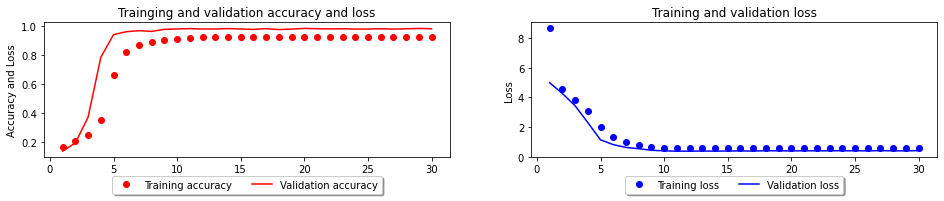

In [25]:
show_graph(history.history)

가중치의 급격환 변화를 L2 규제를 통해 막아두어 처음 2에폭까지는 큰 변화가 없다가 
3~5 에폭이 지나서 모델이 높은 성능에 근접해지는걸 확인할 수 있습니다. 
그럼 조금 더 자세하게 볼 수 있도록 첫 5에폭까지의 데이터는 제외하고 이후의 데이터를 그래프로 확인해보겠습니다.

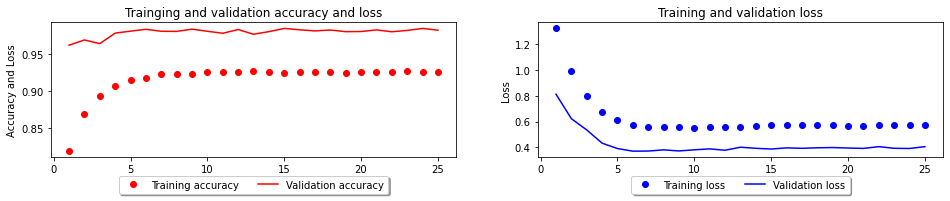

In [26]:
m = map(lambda x: (x[0], x[1][5:]), history.history.items())
not_noise_history = dict(list(m))
show_graph(not_noise_history)

트레이닝 세트의 정확도가 낮게 측정되는건 드랍아웃 때문
학습마다 몇몇의 특정 뉴런을 비활성화 시키기 때문에 정확도가 낮아지게 된다.
훈련을 마친 이후 예측시에는 드랍아웃 시키는 뉴런의 수를 0%로 맞추고 사용

In [27]:
model.evaluate(
    reshape_x_train,
    y_train
)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4208 - acc: 0.9780


[0.4207896590232849, 0.9779833555221558]

In [28]:
model.evaluate(
    reshape_x_test,
    y_test
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4136 - acc: 0.9798


[0.41363999247550964, 0.9797999858856201]

정확도 = 0.97979